## Author : Abhijith P

# Decision Tree classifier

## The sparks foundation
data science and bussiness analytics internship november 2020 batch

#GRIPNOV20

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from sklearn import tree

In [2]:
# Loading the data
iris = pd.read_csv('Iris.csv')
iris = pd.DataFrame(iris)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data cleaning

In [3]:
iris = iris.drop('Id',axis = 1)

In [4]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Exploring data

In [5]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


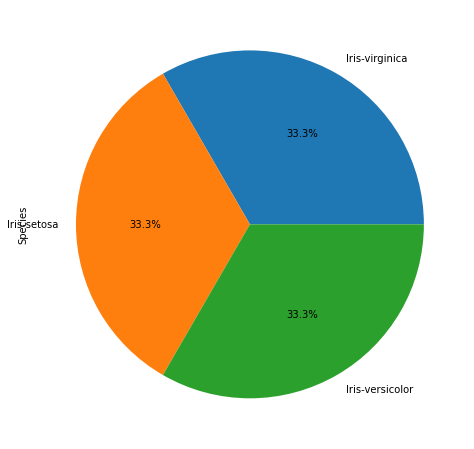

In [6]:
iris.Species.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

from this we can understand that the data is balanced 

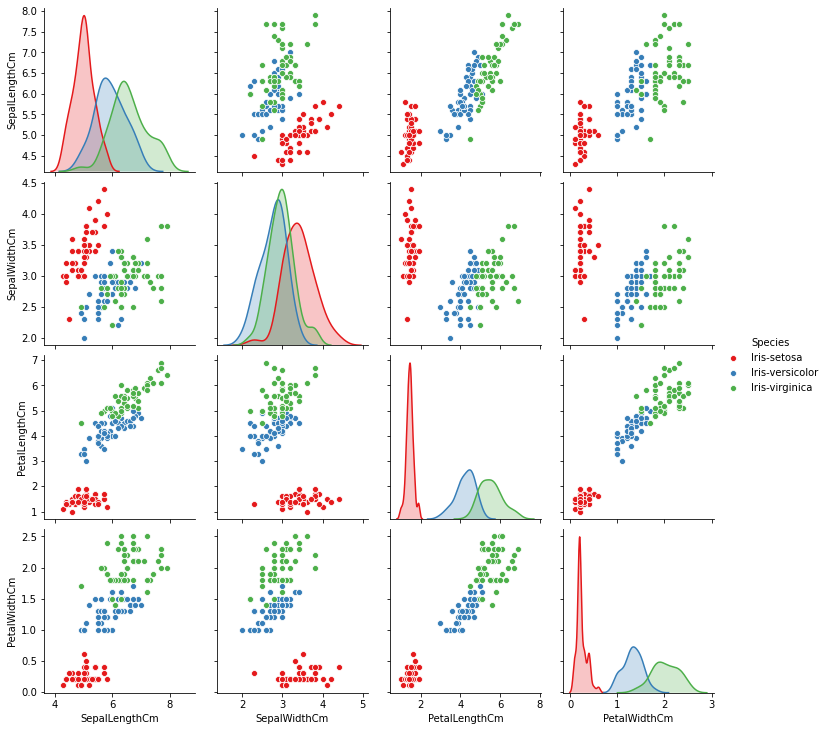

In [7]:
sns.pairplot(iris,hue='Species',palette='Set1')

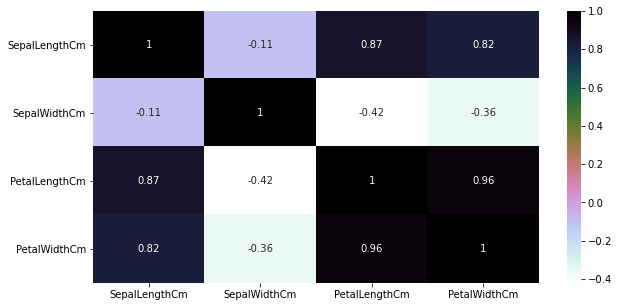

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

## Train test split

In [9]:
from sklearn.model_selection import train_test_split
X = iris.drop('Species',axis=1)
y = iris['Species']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.1)

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and evaluation

In [13]:
print(X_test)
predictions = dtree.predict(X_test)
predictions

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
134            6.1           2.6            5.6           1.4
74             6.4           2.9            4.3           1.3
5              5.4           3.9            1.7           0.4
24             4.8           3.4            1.9           0.2
10             5.4           3.7            1.5           0.2
141            6.9           3.1            5.1           2.3
18             5.7           3.8            1.7           0.3
23             5.1           3.3            1.7           0.5
0              5.1           3.5            1.4           0.2
127            6.1           3.0            4.9           1.8
115            6.4           3.2            5.3           2.3
31             5.4           3.4            1.5           0.4
59             5.2           2.7            3.9           1.4
7              5.0           3.4            1.5           0.2
77             6.7           3.0            5.0           1.7


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification report : ')
print(classification_report(y_test,predictions))


Classification report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.67      0.80         3
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.93        15
      macro avg       0.93      0.89      0.90        15
   weighted avg       0.95      0.93      0.93        15



In [15]:
print(confusion_matrix(y_test , predictions))

[[8 0 0]
 [0 2 1]
 [0 0 4]]


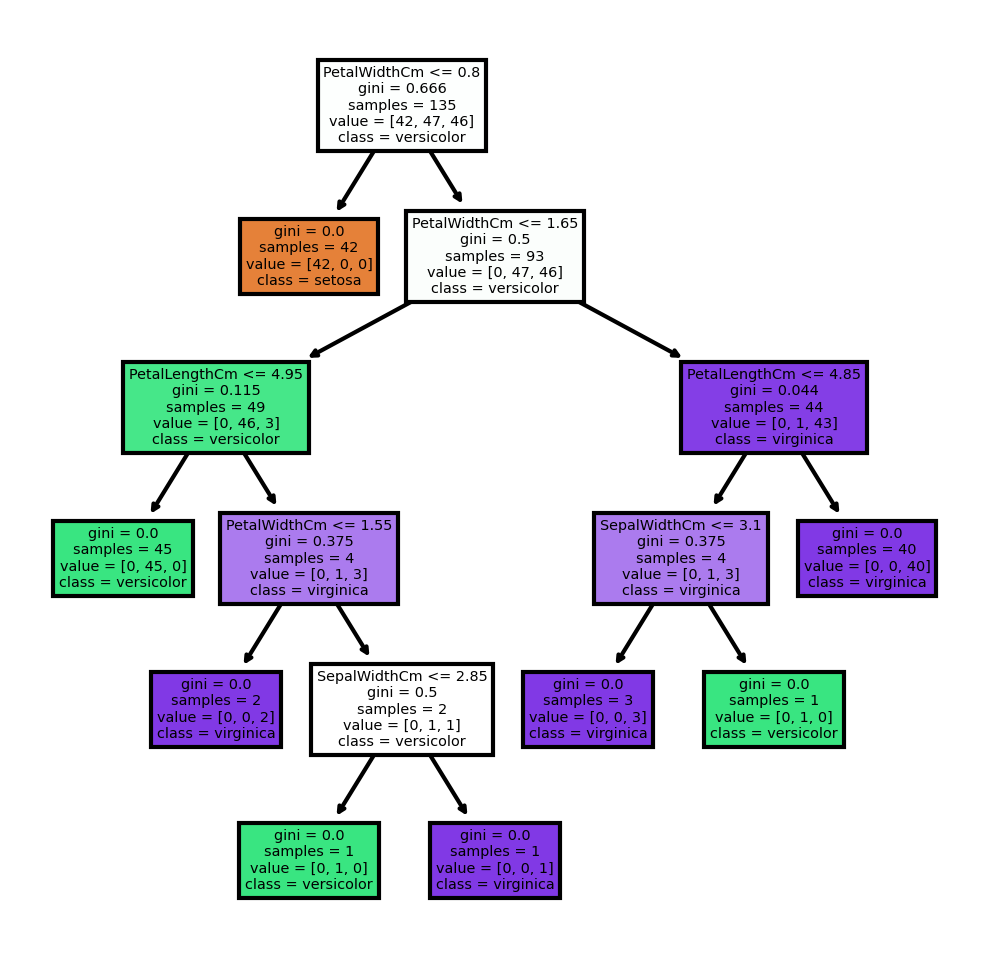

In [16]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

## User input Prediction

In [17]:
data=[float(num) for num in (input("enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width\t:").strip().split())]
predictions = dtree.predict([data])
print(predictions)

enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width	:3.4 4.5 2.4 1.8
['Iris-versicolor']


## The end